In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
dataset = pd.read_csv('/content/drive/MyDrive/salaries (1).csv')
dataset.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [66]:
dataset.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
90694,2024,SE,FT,Data Analyst,160000,USD,160000,US,100,US,M
94441,2024,SE,FT,Software Engineer,260000,USD,260000,US,0,US,M
53664,2025,MI,FT,Software Engineer,303000,USD,303000,US,0,US,M
112600,2024,SE,FT,Research Engineer,284900,USD,284900,US,0,US,M
92477,2024,SE,FT,Engineer,264200,USD,264200,US,0,US,M
107945,2024,MI,FT,Data Analyst,112000,USD,112000,US,0,US,M
62930,2024,EN,FT,Data Analyst,109000,USD,109000,US,100,US,M
7240,2025,SE,FT,Business Analyst,95000,USD,95000,US,100,US,M
73483,2024,MI,FT,Data Scientist,102900,USD,102900,US,0,US,M
124819,2023,SE,FT,Data Engineer,137200,USD,137200,US,100,US,M


In [67]:
dataset.shape

(133349, 11)

# Data cleaning


### 1) Missing / Null values

In [68]:
dataset.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


### 2) Check Duplicates

In [69]:
duplicate_rows = dataset.duplicated()
print(dataset[duplicate_rows].shape[0])
dataset = dataset.drop_duplicates()
print("After removing duplicates")
dataset.shape

68726
After removing duplicates


(64623, 11)

### Show salary distribution

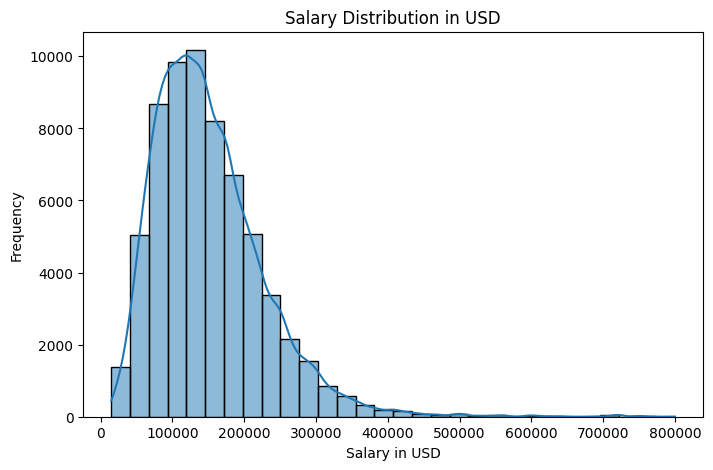

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

### 3) Handling Outliers

In [73]:
q1 = dataset['salary_in_usd'].quantile(0.25)
q3 = dataset['salary_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
dataset = dataset[(dataset['salary_in_usd'] >= lower_bound) & (dataset['salary_in_usd'] <= upper_bound)]

print("After removing outliers")
dataset.shape

After removing outliers


(63046, 11)

# EDA

In [86]:
dataset.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,63046.000000,6.304600e+04,63046.000000,63046.000000
mean,2024.357548,1.561242e+05,144709.797243,24.916727
std,0.735363,2.989238e+05,64746.653028,43.109253
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.520000e+04,95000.000000,0.000000
50%,2024.000000,1.375000e+05,136800.000000,0.000000
75%,2025.000000,1.870000e+05,185600.000000,50.000000
max,2025.000000,3.040000e+07,331320.000000,100.000000


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63046 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           63046 non-null  int64 
 1   experience_level    63046 non-null  object
 2   employment_type     63046 non-null  object
 3   job_title           63046 non-null  object
 4   salary              63046 non-null  int64 
 5   salary_currency     63046 non-null  object
 6   salary_in_usd       63046 non-null  int64 
 7   employee_residence  63046 non-null  object
 8   remote_ratio        63046 non-null  int64 
 9   company_location    63046 non-null  object
 10  company_size        63046 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.8+ MB



### Salary vs Experience Level

/tmp/ipython-input-74-2351780459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='experience_level', data=dataset, palette='husl')


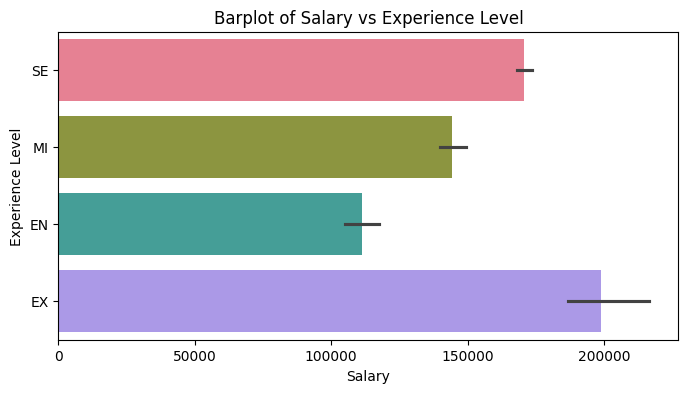

In [74]:
plt.figure(figsize=(8, 4))
sns.barplot(x='salary', y='experience_level', data=dataset, palette='husl')
plt.title('Barplot of Salary vs Experience Level')
plt.xlabel('Salary')
plt.ylabel('Experience Level')
plt.show()

### Salary by Year

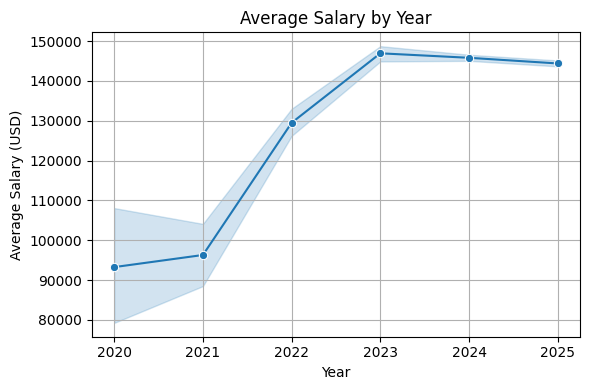

In [75]:
plt.figure(figsize=(6, 4))

sns.lineplot(x='work_year', y='salary_in_usd', data=dataset, estimator='mean', marker='o')

plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Salary vs Remote Ratio

/tmp/ipython-input-76-3206074737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_ratio', y='salary_in_usd', data=dataset, palette='husl')


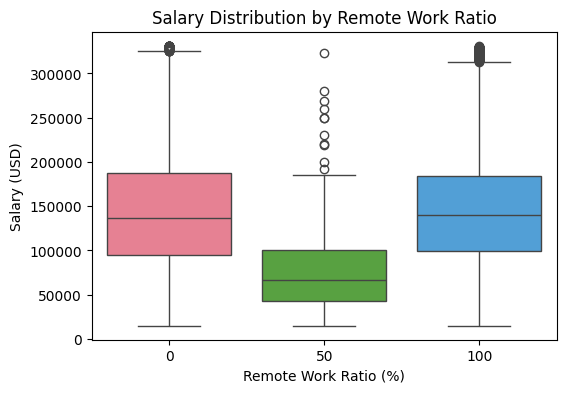

In [76]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=dataset, palette='husl')
plt.title('Salary Distribution by Remote Work Ratio')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Salary (USD)')
plt.show()

### Job title frequency

/tmp/ipython-input-77-1295594620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=dataset, order=dataset['job_title'].value_counts().index[:10], palette='husl')  # Top 10 job titles


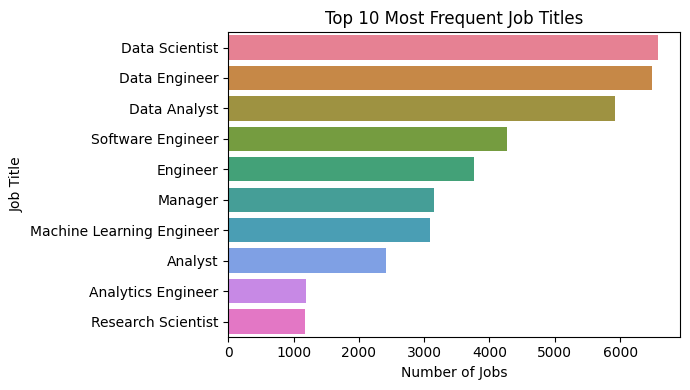

In [77]:
plt.figure(figsize=(7, 4))
sns.countplot(y='job_title', data=dataset, order=dataset['job_title'].value_counts().index[:10], palette='husl')  # Top 10 job titles
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

### Company size vs Salary

/tmp/ipython-input-88-2139544349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=dataset, palette='husl')


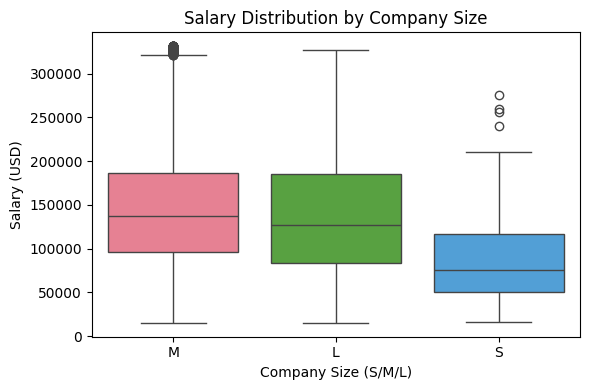

In [88]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='company_size', y='salary_in_usd', data=dataset, palette='husl')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size (S/M/L)')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

### Experience Level count

/tmp/ipython-input-79-3947455564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data=dataset, order=dataset['experience_level'].value_counts().index, palette='husl')


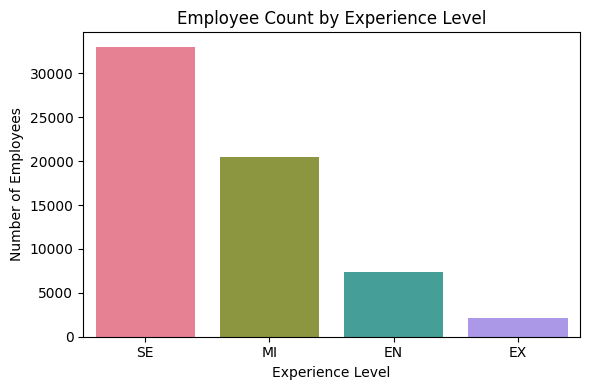

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x='experience_level', data=dataset, order=dataset['experience_level'].value_counts().index, palette='husl')
plt.title('Employee Count by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

### Top countries with high salaries

/tmp/ipython-input-85-902833055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='husl')


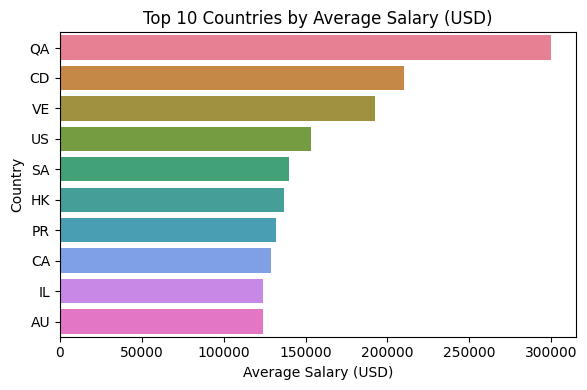

In [85]:
plt.figure(figsize=(6, 4))
top_countries = dataset.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='husl')

plt.title('Top 10 Countries by Average Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()